<a href="https://colab.research.google.com/github/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/INFO5731_Assignment_Three_fall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [4]:
# Write your code here

#Intially I have loaded all the necessary libraries
import requests  
from bs4 import BeautifulSoup as bs 
import re






In [5]:
#I have loaded the empty list
l=[]
# Iterating the loop for all the amazon reviews
for i in range(1,10000):
  m=[] 
  #Here I have taken the reviews of iphone 12 mini green 64GB 
  link="https://www.amazon.com/product-reviews/B08PNKRPCY/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
  response = requests.get(link)
  #Using the Beautiful Soup to extract the HTML
  soup = bs(response.content,"html.parser") 
  #Extracting reviews using the class tags
  reviews = soup.find_all("div",attrs={"class","a-row a-spacing-small review-data"})  
  for i in range(len(reviews)):
    m.append((reviews[i].text).replace('\n',''))
    l=l+m

In [6]:
#Importing the data into the data frame
import pandas as pd
reviews= pd.DataFrame(l ,columns=['reviews'])
reviews

,reviews
0,I'm not sure why there were a handful of 1 sta...
1,I'm not sure why there were a handful of 1 sta...
2,I was scared after reading reviews where some ...
3,I'm not sure why there were a handful of 1 sta...
4,I was scared after reading reviews where some ...
...,...
2030,I was worried about ordering while reading the...
2031,I can use this phone with one hand. Top left c...
2032,12 & 13 mini are the smallest iPhones left. I ...
2033,The battery at 86 still good n everything work...


In [8]:
reviews.to_csv('Iphone12mini.csv', index=False)

In [9]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> al


    Error loading al: Package 'al' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_data...
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Un


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [10]:
raw_data = pd.read_csv("Iphone12mini.csv")
raw_data.head()

,reviews
0,I'm not sure why there were a handful of 1 sta...
1,I'm not sure why there were a handful of 1 sta...
2,I was scared after reading reviews where some ...
3,I'm not sure why there were a handful of 1 sta...
4,I was scared after reading reviews where some ...


In [11]:
#Converting to Lower Case
raw_data['Lower Case'] = raw_data['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
raw_data.head()

,reviews,Lower Case
0,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...
1,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...
2,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...
3,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...
4,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...


In [12]:
#Removal of Punctuation
raw_data['Removal of Punctuation'] = raw_data['Lower Case'].str.replace('[^\w\s]','')
raw_data.head()

<ipython-input-12-fbc472b7bbd0>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  raw_data['Removal of Punctuation'] = raw_data['Lower Case'].str.replace('[^\w\s]','')


,reviews,Lower Case,Removal of Punctuation
0,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...
1,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...
2,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...
3,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...
4,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...


In [13]:
#Removal of Special Characters

import re
raw_data['Removal of Special Characters'] = raw_data['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))
raw_data.head()

,reviews,Lower Case,Removal of Punctuation,Removal of Special Characters
0,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...
1,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...
2,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...
3,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...
4,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...


In [14]:
#Removal of Stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
raw_data['Stopwords Removal'] = raw_data['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
raw_data.head()

,reviews,Lower Case,Removal of Punctuation,Removal of Special Characters,Stopwords Removal
0,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...,im sure handful 1 star reviews receiving produ...
1,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...,im sure handful 1 star reviews receiving produ...
2,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,scared reading reviews people complaining stat...
3,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...,im sure handful 1 star reviews receiving produ...
4,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,scared reading reviews people complaining stat...


In [15]:
#Spelling Correction

from textblob import TextBlob
import multiprocessing as mp

def correct_spelling(text):
    return str(TextBlob(text).correct())

with mp.Pool() as pool:
    results = pool.map(correct_spelling, raw_data['Stopwords Removal'])

raw_data['Spelling Correction'] = results


In [16]:
#Tokenization
import nltk
nltk.download('punkt')
from textblob import TextBlob
raw_data['Tokenization'] = raw_data['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
raw_data['After Stemming'] = raw_data['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [97]:
#Lemmatization
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from textblob import Word
import nltk
nltk.download('wordnet')

raw_data['After Lemmatization'] = raw_data['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
raw_data.head()

,reviews,Lower Case,Removal of Punctuation,Removal of Special Characters,Stopwords Removal,Spelling Correction,Tokenization,After Stemming,After Lemmatization
0,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...,im sure handful 1 star reviews receiving produ...,in sure handful 1 star reviews receiving produ...,"[in, sure, handful, 1, star, reviews, receivin...",in sure hand 1 star review receiv product time...,in sure hand 1 star review receiv product time...
1,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...,im sure handful 1 star reviews receiving produ...,in sure handful 1 star reviews receiving produ...,"[in, sure, handful, 1, star, reviews, receivin...",in sure hand 1 star review receiv product time...,in sure hand 1 star review receiv product time...
2,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,scared reading reviews people complaining stat...,scared reading reviews people complaining stat...,"[scared, reading, reviews, people, complaining...",scare read review peopl complain state phone m...,scare read review peopl complain state phone m...
3,I'm not sure why there were a handful of 1 sta...,i'm not sure why there were a handful of 1 sta...,im not sure why there were a handful of 1 star...,im not sure why there were a handful of 1 star...,im sure handful 1 star reviews receiving produ...,in sure handful 1 star reviews receiving produ...,"[in, sure, handful, 1, star, reviews, receivin...",in sure hand 1 star review receiv product time...,in sure hand 1 star review receiv product time...
4,I was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,i was scared after reading reviews where some ...,scared reading reviews people complaining stat...,scared reading reviews people complaining stat...,"[scared, reading, reviews, people, complaining...",scare read review peopl complain state phone m...,scare read review peopl complain state phone m...


In [99]:
raw_data['After Lemmatization'] = raw_data['After Lemmatization'].apply(lambda x: re.sub(r'\d+', '', x))

In [100]:
raw_data.to_csv('New.csv', index=False)


**TRIGRAMS**

In [101]:

import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = [word_tokenize(sentence) for sentence in raw_data['After Lemmatization'] if sentence]
iterations = list(itertools.chain.from_iterable(words_sentence))
tri_grams = list(ngrams(iterations, 3))
frequency_dist = collections.Counter(tri_grams)


In [102]:
tri_grams = list(ngrams(iterations, 3))
frequency_dist = collections.Counter(tri_grams)

In [103]:
frequency_dist

Counter({('in', 'sure', 'hand'): 370,
         ('sure', 'hand', 'star'): 370,
         ('hand', 'star', 'review'): 370,
         ('star', 'review', 'receiv'): 370,
         ('review', 'receiv', 'product'): 370,
         ('receiv', 'product', 'time'): 370,
         ('product', 'time', 'ship'): 370,
         ('time', 'ship', 'receiv'): 370,
         ('ship', 'receiv', 'daysup'): 370,
         ('receiv', 'daysup', 'fast'): 370,
         ('daysup', 'fast', 'in'): 370,
         ('fast', 'in', 'forev'): 370,
         ('in', 'forev', 'resist'): 370,
         ('forev', 'resist', 'buy'): 370,
         ('resist', 'buy', 'anyth'): 370,
         ('buy', 'anyth', 'refurbish'): 370,
         ('anyth', 'refurbish', 'littl'): 370,
         ('refurbish', 'littl', 'research'): 370,
         ('littl', 'research', 'onlin'): 370,
         ('research', 'onlin', 'amazon'): 370,
         ('onlin', 'amazon', 'standard'): 370,
         ('amazon', 'standard', 'usedveri'): 370,
         ('standard', 'usedveri', '

**PROBABILITY OF BIGRAMS**

In [104]:
from collections import Counter
from nltk import ngrams

bi_grams = list(ngrams(iterations, 2))
frequency_dist = Counter(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
    print(f'{word}:{bi_grams_dict[word] / iterations.count(word[0])}')


('in', 'sure'):0.18181818181818182
('sure', 'hand'):1.0
('hand', 'star'):0.3225806451612903
('star', 'review'):0.5
('review', 'receiv'):0.2
('receiv', 'product'):0.3333333333333333
('product', 'time'):0.5263157894736842
('time', 'ship'):0.9090909090909091
('ship', 'receiv'):1.0
('receiv', 'daysup'):0.3333333333333333
('daysup', 'fast'):1.0
('fast', 'in'):0.4583333333333333
('in', 'forev'):0.18181818181818182
('forev', 'resist'):1.0
('resist', 'buy'):0.5882352941176471
('buy', 'anyth'):0.29411764705882354
('anyth', 'refurbish'):1.0
('refurbish', 'littl'):0.37037037037037035
('littl', 'research'):0.43478260869565216
('research', 'onlin'):1.0
('onlin', 'amazon'):1.0
('amazon', 'standard'):1.0
('standard', 'usedveri'):1.0
('usedveri', 'good'):1.0
('good', 'usedexcel'):0.23255813953488372
('usedexcel', 'etc'):1.0
('etc', 'set'):1.0
('set', 'super'):0.30303030303030304
('super', 'easi'):0.6666666666666666
('easi', 'bit'):0.43478260869565216
('bit', 'hiccup'):0.45454545454545453
('hiccup', 't

**NOUNS AND RELATIVE PHRASE PROBABILITY**

In [105]:

whole_dataset = ''.join(raw_data['After Lemmatization'])
index = [f'Review-{i}' for i in range(1, len(raw_data)+1)]


In [106]:
from textblob import TextBlob

whole_dataset = ' '.join(raw_data['After Lemmatization'])
index = ['Review-' + str(i) for i in range(1, len(raw_data) + 1)]

all_noun_phrases = set()
for line in raw_data['After Lemmatization']:
    blob = TextBlob(line)
    all_noun_phrases.update(blob.noun_phrases)

frequency = []
for line in raw_data['After Lemmatization']:
    line_frequency = []
    for noun_phrase in all_noun_phrases:
        count = line.count(noun_phrase)
        if count > 0:
            line_frequency.append(count / whole_dataset.count(noun_phrase))
        else:
            line_frequency.append(0)
    frequency.append(line_frequency)

noun_phrases_raw_data = pd.DataFrame(frequency, index=index, columns=all_noun_phrases)
noun_phrases_raw_data



,super easi bit hiccup tri phone updat,catch noth,free major debt scratch,batteri health buck good,way wors condit,review bc,phone scratch batteri capac,phone anyon need budget upgrad scare phone,cloud data,phone work,...,reli good didn,phone look wee bit,hand top,need batteri,corner bit,phone plan,formid upgrad anoth phone,glitter case,excel condit,pleasantli surpris excel condit
Review-1,0.002703,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0
Review-2,0.002703,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0
Review-3,0.000000,0.000000,0.003003,0,0.003003,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00159,0.0
Review-4,0.002703,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0
Review-5,0.000000,0.000000,0.003003,0,0.003003,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00159,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-2031,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.005405,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0
Review-2032,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.006757,0.006757,0.006757,0.006757,0.006757,0.0,0.00000,0.0
Review-2033,0.000000,0.000000,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0
Review-2034,0.000000,0.013514,0.000000,0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.013514,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.0


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [108]:
# Write your code here

import math
import warnings

def tf_idf_value(sentence, word):
    size = len(sentence.split(" "))
    tf_value = sentence.count(word) / size
    idf_value = 0
    if tf_value != 0:
        idf_value = math.log(size) / sentence.count(word)
    else:
        return 0
    return tf_value * idf_value

# Filter out RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

sentences = raw_data["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list, columns=["token"])
count = 0
for i in sentences:
    tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
    count += 1

# Reset warnings filter
warnings.resetwarnings()

tf_idf







<ipython-input-108-c1252f3b35f3>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
<ipython-input-108-c1252f3b35f3>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x: tf_idf_value(i, x))
<ipython-input-108-c1252f3b35f3>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

,token,0,1,2,3,4,5,6,7,8,...,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034
0,moves,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.074911,0.000000,0.000000,0.0
1,87,0.052266,0.052266,0.00000,0.052266,0.00000,0.000000,0.052266,0.00000,0.000000,...,0.052266,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,11,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.093937,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,way,0.000000,0.000000,0.08747,0.000000,0.08747,0.000000,0.000000,0.08747,0.000000,...,0.000000,0.08747,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,shocked,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.093937,0.0,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,another,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.074911,0.000000,0.000000,0.0
304,media,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.074911,0.000000,0.000000,0.0
305,even,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.074911,0.149787,0.000000,0.0
306,bc,0.000000,0.000000,0.00000,0.000000,0.00000,0.055309,0.000000,0.00000,0.055309,...,0.000000,0.00000,0.055309,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [110]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [111]:
query_sentence = 'in sure hand star review receiv product time ship receiv daysup fast in forev resist buy anyth refurbish littl research onlin amazon standard usedveri good usedexcel etc set '
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}  

In [112]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2

In [113]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [114]:
similarity_list = []
for sentence in raw_data['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(raw_data['reviews'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,I'm not sure why there were a handful of 1 sta...,0.257491
1,I'm not sure why there were a handful of 1 sta...,0.257491
2,I was scared after reading reviews where some ...,0.064889
3,I'm not sure why there were a handful of 1 sta...,0.257491
4,I was scared after reading reviews where some ...,0.064889
...,...,...
2030,I was worried about ordering while reading the...,0.000000
2031,I can use this phone with one hand. Top left c...,0.029814
2032,12 & 13 mini are the smallest iPhones left. I ...,0.000000
2033,The battery at 86 still good n everything work...,0.038490


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [116]:
# Write your code here
import gensim
import nltk
import pandas as pd

# Check for missing values
if raw_data.isnull().values.any():
    print("Warning: missing values detected in dataframe")

# Tokenize the reviews into sentences
sentences = [nltk.sent_tokenize(review) for review in raw_data['After Lemmatization']]

# Print out the sentences
print(sentences)

from gensim.models import Word2Vec

# Train the Word2Vec model
model = Word2Vec(sentences, min_count=1, vector_size=300)

# Summarize the loaded model
print(model)

# Summarize the vocabulary
words = list(model.wv.key_to_index)
print(words)






[['in sure hand  star review receiv product time ship receiv daysup fast in forev resist buy anyth refurbish littl research onlin amazon standard usedveri good usedexcel etc set super easi bit hiccup tri phone updat transfer set new phone transfer updat much quicker unfortun side buy use dont know previou person phone upon look batteri health  littl irrit rememb go  year oldthat actual pretti good overal  star there doubt compani recent neg review take overlook look rate whole couldn happier purchas'], ['in sure hand  star review receiv product time ship receiv daysup fast in forev resist buy anyth refurbish littl research onlin amazon standard usedveri good usedexcel etc set super easi bit hiccup tri phone updat transfer set new phone transfer updat much quicker unfortun side buy use dont know previou person phone upon look batteri health  littl irrit rememb go  year oldthat actual pretti good overal  star there doubt compani recent neg review take overlook look rate whole couldn happ

In [117]:
print(model.wv.get_vector('in sure hand  star review receiv product time ship receiv daysup fast in forev resist buy anyth refurbish littl research onlin amazon standard usedveri good usedexcel etc set super easi bit hiccup tri phone updat transfer set new phone transfer updat much quicker unfortun side buy use dont know previou person phone upon look batteri health  littl irrit rememb go  year oldthat actual pretti good overal  star there doubt compani recent neg review take overlook look rate whole couldn happier purchas'))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

[-1.78742412e-04  7.88104517e-05  1.70111656e-03  3.00309109e-03
 -3.10098333e-03 -2.37226952e-03  2.15295749e-03  2.99099600e-03
 -1.67180935e-03 -1.25445728e-03  2.46016821e-03 -5.11157094e-04
 -1.51220441e-03  2.18468392e-03 -1.62005343e-03 -6.05339184e-04
  9.58859921e-04  3.30624578e-04 -2.76173837e-03 -3.14960605e-03
  2.43725535e-03  1.69008737e-03  2.25256453e-03  2.54288519e-04
  2.11696350e-03 -1.13512203e-03 -3.15467129e-04  1.92285771e-03
 -2.50721257e-03 -1.31203455e-03 -2.50386074e-03 -3.10014089e-04
  3.17937299e-03 -2.43972219e-03 -7.77922862e-04 -6.45913708e-04
  2.69247894e-03 -1.97696523e-03  1.50541464e-05 -1.58457796e-03
 -3.20118340e-03  1.66909769e-03 -2.91986181e-03 -1.46394176e-03
 -1.16999945e-05 -9.87271487e-05 -2.55374680e-03  3.20491428e-03
  1.66068599e-03  3.07771447e-03 -2.71930569e-03  1.49859942e-03
 -1.37902540e-03  2.74845370e-04  2.83287326e-03 -1.48739223e-03
  1.50583347e-03 -2.26232014e-03 -1.18282950e-03  3.13283596e-03
 -5.25884214e-04  1.07123

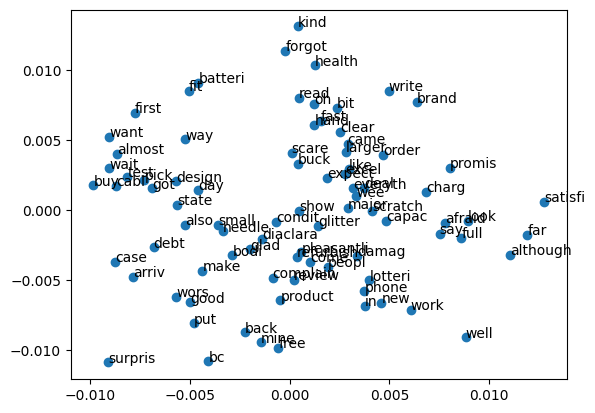

In [118]:
# import necessary libraries
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# define sample sentences
sample_sentences = [['scare', 'read', 'review', 'peopl', 'complain', 'state', 'phone', 'mine', 'came', 'excel', 'condit', 'like', 'case', 'free', 'major', 'debt', 'scratch', 'also', 'batteri', 'health', 'buck', 'good', 'deal', 'expect', 'come', 'way', 'wors', 'condit', 'buy', 'refurbish', 'like', 'lotteri', 'in', 'satisfi', 'product', 'first', 'pick', 'show', 'everyth', 'phone', 'came'],
                    ['order', 'phone', 'wait', 'write', 'review', 'bc', 'want', 'test', 'first', 'afraid', 'order', 'refurbish', 'phone', 'in', 'glad', 'phone', 'arriv', 'day', 'promis', 'expect', 'phone', 'scratch', 'batteri', 'capac', 'got', 'phone', 'look', 'brand', 'new', 'scratch', 'damag', 'kind', 'batteri', 'capac', 'needle', 'say', 'pleasantli', 'surpris', 'excel', 'condit', 'although', 'phone', 'small', 'fit', 'well', 'hand', 'put', 'diaclara', 'design', 'full', 'bodi', 'case', 'phone', 'clear', 'back', 'glitter', 'case', 'make', 'phone', 'look', 'wee', 'bit', 'larger', 'far', 'phone', 'work', 'well', 'oh', 'almost', 'forgot', 'came', 'charg', 'cabl', 'charg', 'fast']]

# train a Word2Vec model on sample sentences
model = Word2Vec(sample_sentences, min_count=1, vector_size=300)

# get the vocabulary of the trained model
words = list(model.wv.index_to_key)

# get the embeddings of the words in the vocabulary
X = model.wv[words]

# reduce the dimensionality of the embeddings using PCA
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

# annotate each point with its corresponding word
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))

# show the plot
pyplot.show()



# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [119]:
# The GitHub link of your final csv file

"https://github.com/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/sentiment_reviews.csv"

# Link: 





'https://github.com/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/sentiment_reviews.csv'